# youtube_datasetを用いた分析練習

## データ、及び必要な機能のインポート

In [58]:
import pandas as pd
import numpy as np
import gzip
#import pandas_profiling as pdp
from IPython.display import display
import dask.dataframe as dd
import time
from datetime import datetime
import math
from collections import Counter
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl

In [59]:
# 日本語対応フォントに変える
# （環境によって異なります。notebook内のみで有効な変更）
# mpl.rcParams['font.family'] =  'MigMix 2P'
mpl.rcParams['font.family'] =  'HGMaruGothicMPRO'

# windows10環境の場合は、IPAフォントをダウンロードした方がよい
# https://qiita.com/yniji/items/3fac25c2ffa316990d0c
# http://akiyoko.hatenablog.jp/entry/2017/04/11/080446

# フォントサイズも大きめにしておく
mpl.rcParams['font.size'] = 10

In [3]:
yt_train = pd.read_csv('yt_bb_classification_train.csv.gz', compression="gzip",names=('youtube_id','timestamp_ms','class_id','class_name','object_presence'))
print(yt_train.shape)
display(yt_train)
display(yt_train.describe())
#print("ユーザー数=", len(df_members["msno"].unique()))

(8146143, 5)


,youtube_id,timestamp_ms,class_id,class_name,object_presence
0,AAADSgKurQY,13000,19,dog,present
1,AAADSgKurQY,14000,19,dog,present
2,AAADSgKurQY,15000,19,dog,present
3,AAADSgKurQY,16000,19,dog,present
4,AAADSgKurQY,17000,19,dog,present
5,AAADSgKurQY,18000,19,dog,present
6,AAADSgKurQY,19000,19,dog,present
7,AAADSgKurQY,20000,19,dog,present
8,AAADSgKurQY,21000,19,dog,present
9,AAADSgKurQY,22000,19,dog,present


,timestamp_ms,class_id
count,8.146143e+06,8.146143e+06
mean,1.437211e+05,8.929339e+00
std,2.126356e+05,7.062860e+00
min,0.000000e+00,0.000000e+00
25%,2.900000e+04,2.000000e+00
50%,7.600000e+04,8.000000e+00
75%,1.800000e+05,1.400000e+01
max,3.586000e+06,2.300000e+01


In [3]:
yt_validation = pd.read_csv('yt_bb_classification_validation.csv.gz', compression="gzip",names=('youtube_id','timestamp_ms','class_id','class_name','object_presence'))
print(yt_validation.shape)
display(yt_validation)
display(yt_validation.describe())

(1013246, 5)


,youtube_id,timestamp_ms,class_id,class_name,object_presence
0,AACebVo-JXY,283000,3,boat,present
1,AACebVo-JXY,284000,3,boat,present
2,AACebVo-JXY,285000,3,boat,present
3,AACebVo-JXY,286000,3,boat,present
4,AACebVo-JXY,287000,3,boat,present
5,AACebVo-JXY,288000,3,boat,present
6,AACebVo-JXY,289000,3,boat,present
7,AACebVo-JXY,290000,3,boat,present
8,AACebVo-JXY,291000,3,boat,present
9,AACebVo-JXY,292000,3,boat,present


,timestamp_ms,class_id
count,1.013246e+06,1.013246e+06
mean,1.410868e+05,8.844676e+00
std,2.089055e+05,7.103110e+00
min,0.000000e+00,0.000000e+00
25%,2.800000e+04,2.000000e+00
50%,7.500000e+04,7.000000e+00
75%,1.790000e+05,1.400000e+01
max,3.556000e+06,2.300000e+01


## 各種データについての確認

使用データセット:Youtube-BB Dataset  
ようつべにアップロードされている作品中で写っている物体とその動画IDとかその時間で物体が写っているかどうかが記録されている  
https://research.google.com/youtube-bb/

### youtube_id - (string) 
the YouTube identifier of the video the segment was extracted from. One may view the selected video at [ http://youtu.be/${youtube_id} ].  
 →セグメントが抽出された動画のYouTube識別子

### timestamp_ms - (integer)   
the time in milliseconds of the classified frame in the video.  
→ビデオ内の分類されたフレームのミリ秒単位の時間

### class_id - (integer)  
a numeric identifier for the object class.  
→オブジェクトクラスの数値識別子

### class_name - (string)  
a human-readable name for the object class.  
→オブジェクト名

### object_presence - (string)  
whether or not the object is present in the frame ('present' or 'absent').  
→オブジェクトがフレーム内に存在するか否か（ 'present'または 'absent'）

## 算出したいものまとめ
- 動画の分類(教師なし)
- 動画に写っているか否かでの動画の特徴(教師なし→確認)
- 動画の時間から何が写っているかの予測(教師あり)
- 動画に写るものから動画時間を予測する(教師あり)

In [6]:
yt_train.to_csv('yt_train_data.csv',encoding='utf-8',index=False)

# 各種データの確認、及び変換

## データ全体を確認

### 基礎統計

In [5]:
yt_train

,timestamp_ms,class_id
count,8.146143e+06,8.146143e+06
mean,1.437211e+05,8.929339e+00
std,2.126356e+05,7.062860e+00
min,0.000000e+00,0.000000e+00
25%,2.900000e+04,2.000000e+00
50%,7.600000e+04,8.000000e+00
75%,1.800000e+05,1.400000e+01
max,3.586000e+06,2.300000e+01


### 全体の欠損を確認

In [6]:
yt_train[yt_train.isnull().any(1)]

,youtube_id,timestamp_ms,class_id,class_name,object_presence


### 全体のユニーク数を確認

In [7]:
yt_train.nunique()

youtube_id         253569
timestamp_ms         3587
class_id               24
class_name             24
object_presence         2
dtype: int64

### 相関係数

In [8]:
yt_train.corr()

,timestamp_ms,class_id
timestamp_ms,1.000000,0.043126
class_id,0.043126,1.000000


### 最頻値

In [9]:
yt_train.mode()

,youtube_id,timestamp_ms,class_id,class_name,object_presence
0,peFIHPWhmQI,15000,0,person,present


## youtube_idについて

### 各IDごとの情報  
- 各IDのデータ数(youtube_id,count)  
- 投稿動画の平均時間(timestamp_ms,mean)  
- 投稿動画の合計時間(timestamp_ms,sum)  
- class_idのユニーク数(class_id,nunique)

In [20]:
yt_train.groupby('youtube_id').agg({'class_name':'count','timestamp_ms':'nunique','class_id':'nunique'}).reset_index().sort_values(by='class_id',ascending=False)

,youtube_id,class_name,timestamp_ms,class_id
182051,i0GUipDNV8U,91,88,5
51930,C0hqvqLGTik,90,90,5
164691,dc9YDfXBZRo,170,151,5
129382,VmoZsKeLsuE,119,119,5
79216,IxObyCZ6OfY,193,193,5
92833,MSniUQvUgNg,119,115,5
62224,EbPmYXOIzb8,97,89,5
191293,kLWy2pm_EEc,273,273,5
184520,idq0Jqw8Oa0,151,148,4
107551,QDimNf6xamc,112,108,4


In [19]:
yt_train[yt_train['youtube_id']=='C0hqvqLGTik']

,youtube_id,timestamp_ms,class_id,class_name,object_presence
703229,C0hqvqLGTik,133000,5,bear,present
703230,C0hqvqLGTik,134000,5,bear,present
703231,C0hqvqLGTik,135000,5,bear,present
703232,C0hqvqLGTik,136000,5,bear,present
703233,C0hqvqLGTik,137000,5,bear,present
703234,C0hqvqLGTik,138000,5,bear,present
703235,C0hqvqLGTik,139000,5,bear,present
703236,C0hqvqLGTik,140000,5,bear,present
703237,C0hqvqLGTik,141000,5,bear,present
703238,C0hqvqLGTik,142000,5,bear,present


## timestamp_msについて

### 各動画時間についての情報   
- 動画時間ごとのデータ数(timestamp_ms,count)  
- 動画時間ごとの動画数(youtube_id,nunique)  
- 動画時間ごとのクラスIDのユニーク数(class_id,nunique)  

In [38]:
yt_train.groupby('timestamp_ms').agg({'timestamp_ms':'count','youtube_id':'nunique','class_id':'nunique'})

,timestamp_ms,youtube_id,class_id
timestamp_ms,,,
0,73205,72581,24
1000,73202,72578,24
2000,73197,72573,24
3000,73200,72576,24
4000,73190,72566,24
5000,73170,72546,24
6000,73171,72547,24
7000,73158,72534,24
8000,73151,72527,24


## class_idについて

### class_idについての情報  
- 各クラスIDごとの作品数(class_id,count)  
- 各クラスIDごとの動画数(youtube_id,nunique)  
- 各クラスIDごとの平均・合計動画時間(timestamp_ms,mean/sum)  

In [11]:
yt_train.groupby('class_id').agg({'class_id':'count','youtube_id':'nunique','timestamp_ms':['mean','max']})

class_id youtube_id   timestamp_ms         
            count    nunique           mean      max
class_id                                            
0         1492159      61885  103155.591328  3436000
1          381409       9328  112031.467532  2776000
2          214522       4945  225164.761656  3586000
3          309155       8793  143364.018049  3496000
4          364935      11223  173456.651184  3406000
5          315929       7137  151399.159305  3106000
6          397821      13722  181212.904799  3406000
7          577420      26439   91858.993454  3226000
8           45893       1356  228907.676552  3526000
9          203868       5633  231945.430377  3571000
10         440894      10156  130347.326115  3571000
11         280626      10269  132050.547704  2431000
12         420445       8136  261922.058771  3451000
13         324170       7545  192801.363482  3541000
14         383612      11045  112313.118463  1846000
15         321629       9668  130946.463161  3556000
16         285699       8780  152847.251828  3301000
17          25835        888  177345.616412  2461000
18         178565       7646  131520.611542  2911000
19         453509      12520   96237.702008  3586000
20         286334       6352  187139.445543  3586000
21         162848       5962  199482.677098  3541000
22          20457       1225  177726.108423  3166000
23         258409       8699  116105.491682  3286000

## class_nameについて

### 各クラス名についての情報  
- 各クラス名ごとのクラスID(class_id,mid/nunique)
- 各クラス名ごとのデータ数(class_name,count)  
- 各クラス名ごとの投稿者数(youtube_id,nunique)  
- 各クラス名ごとの平均・合計動画時間(timestamp_ms,mean/sum)  

In [12]:
yt_train.groupby('class_name').agg({'class_name':'count','class_id':['mean','nunique'],'youtube_id':'nunique','timestamp_ms':['mean','max']})

class_name class_id         youtube_id   timestamp_ms         
                  count     mean nunique    nunique           mean      max
class_name                                                                 
airplane         324170       13       1       7545  192801.363482  3541000
bear             315929        5       1       7137  151399.159305  3106000
bicycle          214522        2       1       4945  225164.761656  3586000
bird             381409        1       1       9328  112031.467532  2776000
boat             309155        3       1       8793  143364.018049  3496000
bus              364935        4       1      11223  173456.651184  3406000
car              258409       23       1       8699  116105.491682  3286000
cat              577420        7       1      26439   91858.993454  3226000
cow              397821        6       1      13722  181212.904799  3406000
dog              453509       19       1      12520   96237.702008  3586000
elephant         286334       20       1       6352  187139.445543  3586000
giraffe           45893        8       1       1356  228907.676552  3526000
horse            440894       10       1      10156  130347.326115  3571000
knife            420445       12       1       8136  261922.058771  3451000
motorcycle       280626       11       1      10269  132050.547704  2431000
none              20457       22       1       1225  177726.108423  3166000
person          1492159        0       1      61885  103155.591328  3436000
potted plant     203868        9       1       5633  231945.430377  3571000
skateboard       383612       14       1      11045  112313.118463  1846000
toilet           178565       18       1       7646  131520.611542  2911000
train            321629       15       1       9668  130946.463161  3556000
truck            285699       16       1       8780  152847.251828  3301000
umbrella         162848       21       1       5962  199482.677098  3541000
zebra             25835       17       1        888  177345.616412  2461000

## object_presenceについて

### オブジェクトの有無についての情報
- オブジェクトの有無によるデータ数の違い(object_presence,count)  
- オブジェクトの有無による動画数の違い(youtube_id,nunique)  
- オブジェクトの有無による動画時間の違い(timestamp_ms,mean/sum)  
- オブジェクトの有無によるクラスIDの種類数(class_id,nunique)

In [14]:
yt_train.groupby('object_presence').agg({'object_presence':'count','youtube_id':'nunique','timestamp_ms':['mean','max','min'],'class_id':'nunique'})

object_presence youtube_id   timestamp_ms               \
                          count    nunique           mean      max min   
object_presence                                                          
absent                   784166      98376  162372.450476  3580000   0   
present                 7361977     242320  141734.458692  3586000   0   

                class_id  
                 nunique  
object_presence           
absent                23  
present               24

# 分析方針
冷静に考えてこのデータだけだと分析の方針がまとまりませんね(？)  
でも頑張って分析方針をまとめました(吐血)

## 現状で建てられる分析方針とか予測とか
- 動画に物体が写っているかどうかを確認することはできる  
-- 物体ごとの写り方による予測とか、各物体ごとに写りやすいかどうか見れる  
-- 物体の写っている時間とかはわかりそう
- 動画の時間毎に何が写っているかがわかる  
-- その動画の時間に何が写るのかの予測ができそう  
- 物体ごとの動画数や動画の時間の平均はわかる  
-- 動画の時間からどの物体が写るかが予測はできそう

## やることまとめ
- 物体毎に写っている時間の算出

# データの変換、及び算出作業

## 動画別/オブジェクト別に写っている時間の算出
各動画について、物体が写っている時間と写っていない時間で分けてしまう  
手順  
- 各動画における写っていない時間のみを抽出
- 写っていない時間を算出(写ったり写らなかったりする場合ばすべての合算)

データ詳細  
- cal :動画IDごとにclassのabsent/present別の時間をnuniqueとして算出
- cal2:classごとにyoutube_idのユニーク数とabsent/present別の時間を算出

In [65]:
yt_train_a=yt_train[yt_train['object_presence']=='absent']

In [10]:
a=yt_train_a.groupby(['youtube_id','class_name']).agg({'timestamp_ms':'count'}).reset_index().rename(columns={'timestamp_ms':'absent_time'})

In [6]:
yt_train_b=yt_train[yt_train['object_presence']=='present']

In [7]:
b=yt_train_b.groupby(['youtube_id','class_name']).agg({'timestamp_ms':'count'}).reset_index().rename(columns={'timestamp_ms':'present_time'})

### 動画ID別のフレーム内に写っている/写っていない時間の合計
- youtube_id : 動画ID
- class_name : オブジェクト名
- present_time : 写っている時間の合計
- absent_time : 写っていない時間の合計

In [11]:
#動画別の写っているものとフレーム内登場時間と非登場時間の算出
cal=pd.merge(b,a,how='outer',on=['youtube_id','class_name'])
cal

,youtube_id,class_name,present_time,absent_time
0,--0bLFuriZ4,person,19.0,NaN
1,--2LyLmEaq8,dog,38.0,NaN
2,--4VWx_0Sc4,person,1.0,18.0
3,--4xkUrLgjA,motorcycle,17.0,NaN
4,--4yByFm8j4,truck,19.0,2.0
5,--7Jrp2urUc,bird,18.0,1.0
6,--7KXqgihyw,person,14.0,5.0
7,--7L39R9NG0,person,16.0,3.0
8,--A-XRFwRt8,cat,19.0,NaN
9,--AjlzHEFNs,bird,93.0,2.0


In [12]:
cal=cal.fillna(0)

In [13]:
cal.groupby('youtube_id').agg({'class_name':'nunique','present_time':'sum','absent_time':'sum'})

,class_name,present_time,absent_time
youtube_id,,,
--0bLFuriZ4,1,19.0,0.0
--2LyLmEaq8,1,38.0,0.0
--4VWx_0Sc4,1,1.0,18.0
--4xkUrLgjA,1,17.0,0.0
--4yByFm8j4,1,19.0,2.0
--7Jrp2urUc,1,18.0,1.0
--7KXqgihyw,1,14.0,5.0
--7L39R9NG0,1,16.0,3.0
--A-XRFwRt8,1,19.0,0.0


In [14]:
c=yt_train_a.groupby(['class_name']).agg({'timestamp_ms':'count','youtube_id':'nunique'}).reset_index().rename(columns={'timestamp_ms':'absent_time','youtube_id':'absent_id'})
d=yt_train_b.groupby(['class_name']).agg({'timestamp_ms':'count','youtube_id':'nunique'}).reset_index().rename(columns={'timestamp_ms':'present_time','youtube_id':'present_id'})

In [15]:
c

,class_name,absent_time,absent_id
0,airplane,29748,3374
1,bear,43387,4160
2,bicycle,8532,1807
3,bird,38654,4210
4,boat,19082,2865
5,bus,47028,5778
6,car,21240,1882
7,cat,42755,6621
8,cow,52574,6732
9,dog,28127,4534


In [16]:
d

,class_name,present_time,present_id
0,airplane,294422,7137
1,bear,272542,6005
2,bicycle,205990,4893
3,bird,342755,8303
4,boat,290073,8517
5,bus,317907,10622
6,car,237169,8345
7,cat,534665,25420
8,cow,345247,12801
9,dog,425382,12008


### 各オブジェクト別のフレーム内に写っている/写っていない時間の合計
- class_name : オブジェクト名
- present_time : 写っている時間の合計
- present_id : 写っている動画数
- absent_time : 写っていない時間の合計
- absent_id : 写っていない動画数

In [17]:
#class別の写っているものとフレーム内登場時間と非登場時間の算出
cal2=pd.merge(d,c,how='outer',on='class_name')
cal2

,class_name,present_time,present_id,absent_time,absent_id
0,airplane,294422,7137,29748.0,3374.0
1,bear,272542,6005,43387.0,4160.0
2,bicycle,205990,4893,8532.0,1807.0
3,bird,342755,8303,38654.0,4210.0
4,boat,290073,8517,19082.0,2865.0
5,bus,317907,10622,47028.0,5778.0
6,car,237169,8345,21240.0,1882.0
7,cat,534665,25420,42755.0,6621.0
8,cow,345247,12801,52574.0,6732.0
9,dog,425382,12008,28127.0,4534.0


In [18]:
cal2=cal2.fillna(0)

## 基礎集計～動画ID別データ編～

### 各動画IDにおけるオブジェクトの数について
オブジェクト数(種類問わず)が登録されている動画の数を算出。結果としては1つのオブジェクトのみのものが最も多かった

In [66]:
cal_object=cal.groupby('youtube_id').agg({'class_name':'nunique'}).reset_index()
cal_object.sort_values(by='class_name',ascending=False)

,youtube_id,class_name
182051,i0GUipDNV8U,5
51930,C0hqvqLGTik,5
164691,dc9YDfXBZRo,5
129382,VmoZsKeLsuE,5
79216,IxObyCZ6OfY,5
92833,MSniUQvUgNg,5
62224,EbPmYXOIzb8,5
191293,kLWy2pm_EEc,5
184520,idq0Jqw8Oa0,4
107551,QDimNf6xamc,4


In [74]:
cal_object=cal_object.groupby('class_name').count().reset_index().rename(columns={'class_name':'オブジェクト数','youtube_id':'動画数'})

KeyError: 'class_name'

In [76]:
cal_object

,オブジェクト数,動画数
0,1,248094
1,2,5212
2,3,226
3,4,29
4,5,8


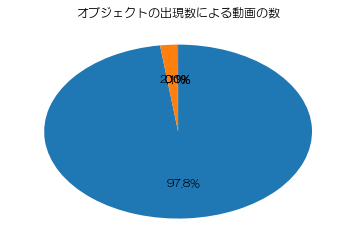

In [78]:
x=cal_object['オブジェクト数']
y=cal_object['動画数']
plt.pie(y, counterclock=False, startangle=90, autopct="%1.1f%%")
plt.title('オブジェクトの出現数による動画の数')
plt.show()

### 各動画IDにおけるオブジェクト1つ当たりの写った時間の合計値について
動画の中でオブジェクト1つ当たりの写っている時間が最も長いものは、1405秒(23分強)であった  
また、各動画ID別のオブジェクトごとの写っている時間の合計について、最も長いものは'bicycle'の動画であった

In [46]:
cal_present=cal.groupby('youtube_id').agg({'present_time':'sum','class_name':'nunique'}).reset_index()
cal_present['time_par_object']=cal_present['present_time']/cal_present['class_name']

In [45]:
cal_present.sort_values(by='time_par_object',ascending=False)

,youtube_id,present_time,class_name,time_par_object
212466,peFIHPWhmQI,1405.0,1,1405.0
21577,4ShvnJfxNkc,1273.0,1,1273.0
19354,3tKIxwor39g,1217.0,1,1217.0
124512,UY2u-sBAUvc,1102.0,1,1102.0
138334,Y3_l0wSPZwM,967.0,1,967.0
136480,XaerZtxCp3w,892.0,1,892.0
244295,xemv_TG3nHo,826.0,1,826.0
58573,DfS7lvAcDQc,814.0,1,814.0
249841,z2KLEemaXao,798.0,1,798.0
83638,K3z3GocLdWs,796.0,1,796.0


In [49]:
cal_present_2=cal.groupby(['youtube_id','class_name']).agg({'present_time':'sum'}).reset_index()
cal_present_2.sort_values(by='present_time',ascending=False)

,youtube_id,class_name,present_time
217364,peFIHPWhmQI,bicycle,1405.0
22016,4ShvnJfxNkc,potted plant,1273.0
19750,3tKIxwor39g,dog,1217.0
90858,LNp5cxWa83I,horse,1105.0
127471,UY2u-sBAUvc,potted plant,1102.0
141596,Y3_l0wSPZwM,bicycle,967.0
146508,ZH-X6nu5grI,horse,930.0
139692,XaerZtxCp3w,airplane,892.0
249871,xemv_TG3nHo,boat,826.0
59999,DfS7lvAcDQc,umbrella,814.0


### 各動画IDにおけるオブジェクトが写っていない時間の合計について
各動画IDにおけるオブジェクトが写っていない時間の合計が最も長いものは、192秒(3分12秒)であった  
また、各動画IDにおけるオブジェクトが写っていない時間の合計が最も長いものは'giraff'の動画であった

In [51]:
cal_absent=cal.groupby('youtube_id').agg({'absent_time':'sum','class_name':'nunique'}).reset_index()
cal_absent['time_par_object']=cal_absent['absent_time']/cal_absent['class_name']

In [57]:
cal_absent.sort_values(by='time_par_object',ascending=False)

,youtube_id,absent_time,class_name,time_par_object
95929,NFMM6Gh08M8,192.0,1,192.0
8979,1ETb7xs3XOc,174.0,1,174.0
59083,Do5BN3hh7K4,174.0,1,174.0
50749,BiVq7R0A0lk,158.0,1,158.0
227945,tXad5_JjZHA,150.0,1,150.0
101168,OaOqwNHlVaM,145.0,1,145.0
117607,SljihkXI030,128.0,1,128.0
26152,5aebWlYqlcY,124.0,1,124.0
130377,W24wThdaAws,115.0,1,115.0
238129,w66g3gkbVco,114.0,1,114.0


In [54]:
cal_absent_2=cal.groupby(['youtube_id','class_name']).agg({'absent_time':'sum'}).reset_index()
cal_absent_2.sort_values(by='absent_time',ascending=False)

,youtube_id,class_name,absent_time
148442,ZkGppsPSqhc,giraffe,217.0
98225,NFMM6Gh08M8,train,192.0
9149,1ETb7xs3XOc,train,174.0
60529,Do5BN3hh7K4,train,174.0
51914,BiVq7R0A0lk,train,158.0
233181,tXad5_JjZHA,bird,150.0
103575,OaOqwNHlVaM,train,145.0
120420,SljihkXI030,bear,128.0
26697,5aebWlYqlcY,train,124.0
47669,Ai08M0Ycqt8,train,123.0


## 基礎集計～各オブジェクト編～

### 各オブジェクトの写っている動画について
各オブジェクトについて、最も写っている時間が長いオブジェクトは'person'であった。  
また、最も写っている時間がある動画数が多いオブジェクトも同様に最も'person'であった。  
しかし、1つの動画当たりに写っている時間が最も長いオブジェクトは'knife'となった。

In [71]:
cal2_present=cal2.groupby('class_name').agg({'present_time':'mean','present_id':'mean'}).reset_index()
cal2_present['time_par_movie']=cal2_present['present_time']/cal2_present['present_id']
cal2_present

,class_name,present_time,present_id,time_par_movie
0,airplane,294422,7137,41.252907
1,bear,272542,6005,45.385845
2,bicycle,205990,4893,42.098917
3,bird,342755,8303,41.280862
4,boat,290073,8517,34.058119
5,bus,317907,10622,29.929109
6,car,237169,8345,28.420491
7,cat,534665,25420,21.033242
8,cow,345247,12801,26.970315
9,dog,425382,12008,35.424883


In [72]:
cal2_present.sort_values(by='present_time',ascending=False)

,class_name,present_time,present_id,time_par_movie
16,person,1390505,60908,22.829595
7,cat,534665,25420,21.033242
9,dog,425382,12008,35.424883
12,horse,413069,9657,42.774050
13,knife,394113,7415,53.150775
8,cow,345247,12801,26.970315
3,bird,342755,8303,41.280862
18,skateboard,335871,10327,32.523579
5,bus,317907,10622,29.929109
0,airplane,294422,7137,41.252907


In [73]:
cal2_present.sort_values(by='present_id',ascending=False)

,class_name,present_time,present_id,time_par_movie
16,person,1390505,60908,22.829595
7,cat,534665,25420,21.033242
8,cow,345247,12801,26.970315
9,dog,425382,12008,35.424883
5,bus,317907,10622,29.929109
18,skateboard,335871,10327,32.523579
14,motorcycle,261990,9994,26.214729
12,horse,413069,9657,42.774050
20,train,261675,8852,29.561116
4,boat,290073,8517,34.058119


In [74]:
cal2_present.sort_values(by='time_par_movie',ascending=False)

,class_name,present_time,present_id,time_par_movie
13,knife,394113,7415,53.150775
1,bear,272542,6005,45.385845
10,elephant,250070,5745,43.528285
12,horse,413069,9657,42.774050
2,bicycle,205990,4893,42.098917
3,bird,342755,8303,41.280862
0,airplane,294422,7137,41.252907
9,dog,425382,12008,35.424883
17,potted plant,187299,5403,34.665741
4,boat,290073,8517,34.058119


### 各オブジェクトの写っていない動画について
各オブジェクトについて、最も写っていない時間が長いオブジェクトは'person'であった。  
また、最も写っていない時間がある動画数が多いオブジェクトも同様に最も'person'であった。  
しかし、1つの動画当たりに写っていない時間が最も長いオブジェクトは'train'となった。

In [77]:
cal2_absent=cal2.groupby('class_name').agg({'absent_time':'mean','absent_id':'mean'}).reset_index()
cal2_absent['time_par_movie']=cal2_absent['absent_time']/cal2_absent['absent_id']
cal2_absent

,class_name,absent_time,absent_id,time_par_movie
0,airplane,29748.0,3374.0,8.816835
1,bear,43387.0,4160.0,10.429567
2,bicycle,8532.0,1807.0,4.721638
3,bird,38654.0,4210.0,9.181473
4,boat,19082.0,2865.0,6.660384
5,bus,47028.0,5778.0,8.139148
6,car,21240.0,1882.0,11.285866
7,cat,42755.0,6621.0,6.457484
8,cow,52574.0,6732.0,7.809566
9,dog,28127.0,4534.0,6.203573


In [78]:
cal2_absent.sort_values(by='absent_time',ascending=False)

,class_name,absent_time,absent_id,time_par_movie
16,person,101654.0,16622.0,6.115630
19,toilet,63096.0,6026.0,10.470627
20,train,59954.0,4162.0,14.405094
8,cow,52574.0,6732.0,7.809566
18,skateboard,47741.0,7811.0,6.112022
5,bus,47028.0,5778.0,8.139148
1,bear,43387.0,4160.0,10.429567
7,cat,42755.0,6621.0,6.457484
3,bird,38654.0,4210.0,9.181473
10,elephant,36264.0,3729.0,9.724859


In [79]:
cal2_absent.sort_values(by='absent_id',ascending=False)

,class_name,absent_time,absent_id,time_par_movie
16,person,101654.0,16622.0,6.115630
18,skateboard,47741.0,7811.0,6.112022
8,cow,52574.0,6732.0,7.809566
7,cat,42755.0,6621.0,6.457484
19,toilet,63096.0,6026.0,10.470627
5,bus,47028.0,5778.0,8.139148
9,dog,28127.0,4534.0,6.203573
3,bird,38654.0,4210.0,9.181473
20,train,59954.0,4162.0,14.405094
1,bear,43387.0,4160.0,10.429567


In [80]:
cal2_absent.sort_values(by='time_par_movie',ascending=False)

,class_name,absent_time,absent_id,time_par_movie
20,train,59954.0,4162.0,14.405094
6,car,21240.0,1882.0,11.285866
19,toilet,63096.0,6026.0,10.470627
1,bear,43387.0,4160.0,10.429567
13,knife,26332.0,2691.0,9.785210
10,elephant,36264.0,3729.0,9.724859
3,bird,38654.0,4210.0,9.181473
23,zebra,5574.0,615.0,9.063415
0,airplane,29748.0,3374.0,8.816835
5,bus,47028.0,5778.0,8.139148


## 基礎集計～各時間編～

### 全体

In [62]:
time_data=yt_train.groupby('timestamp_ms').agg({'class_id':'count','class_name':'nunique','youtube_id':'nunique'}).reset_index()
time_data

,timestamp_ms,class_id,class_name,youtube_id
0,0,73205,24,72581
1,1000,73202,24,72578
2,2000,73197,24,72573
3,3000,73200,24,72576
4,4000,73190,24,72566
5,5000,73170,24,72546
6,6000,73171,24,72547
7,7000,73158,24,72534
8,8000,73151,24,72527
9,9000,73151,24,72527


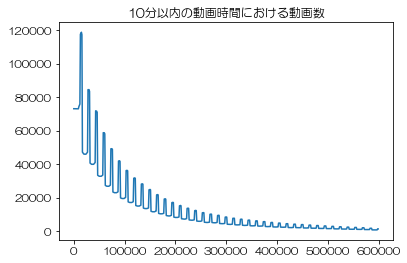

In [63]:
x=time_data['timestamp_ms'].head(600)
y=time_data['class_id'].head(600)
plt.plot(x,y)
plt.title('10分以内の動画時間における動画数')
plt.show()

なーんで襞状になっているんすかねぇ

### オブジェクトが写っているデータと写っていないデータの比較

In [23]:
time_data_b=yt_train[yt_train['object_presence']=='present'].groupby('timestamp_ms').agg({'class_name':'nunique','youtube_id':'nunique'}).reset_index().rename(columns={'class_name':'present_object_num','youtube_id':'present_movie_num'})
time_data_b

,timestamp_ms,present_object_num,present_movie_num
0,0,24,62737
1,1000,24,66600
2,2000,24,67657
3,3000,24,68399
4,4000,24,68187
5,5000,24,67914
6,6000,24,67718
7,7000,24,67361
8,8000,24,67180
9,9000,24,66968


In [24]:
time_data_a=yt_train[yt_train['object_presence']=='absent'].groupby('timestamp_ms').agg({'class_name':'nunique','youtube_id':'nunique'}).reset_index().rename(columns={'class_name':'absent_object_num','youtube_id':'absent_movie_num'})
time_data_a

,timestamp_ms,absent_object_num,absent_movie_num
0,0,23,9935
1,1000,23,6071
2,2000,23,5011
3,3000,23,4263
4,4000,23,4464
5,5000,23,4718
6,6000,23,4924
7,7000,23,5261
8,8000,23,5434
9,9000,23,5647


In [27]:
time_merge=pd.merge(time_data_b,time_data_a,how='outer',on='timestamp_ms')
time_merge=time_merge.fillna(0)

In [32]:
time_merge.sort_values('present_movie_num',ascending=False)

,timestamp_ms,present_object_num,present_movie_num,absent_object_num,absent_movie_num
15,15000,24,107072,23.0,10912.0
14,14000,24,106603,23.0,10895.0
13,13000,24,105871,23.0,10885.0
16,16000,24,105683,23.0,10880.0
30,30000,24,76197,23.0,7795.0
28,28000,24,76177,23.0,7833.0
29,29000,24,76056,23.0,7853.0
31,31000,24,75124,23.0,7781.0
12,12000,24,68686,23.0,6740.0
3,3000,24,68399,23.0,4263.0


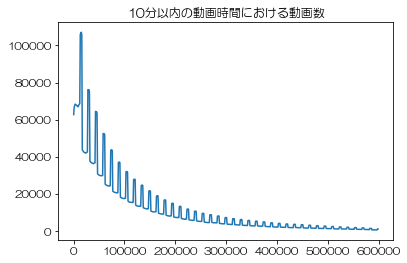

In [60]:
x=time_merge['timestamp_ms'].head(600)
y=time_merge['present_movie_num'].head(600)
plt.plot(x,y)
plt.title('10分以内の動画時間における動画数')
plt.show()

In [33]:
time_merge.sort_values('absent_movie_num',ascending=False)

,timestamp_ms,present_object_num,present_movie_num,absent_object_num,absent_movie_num
15,15000,24,107072,23.0,10912.0
14,14000,24,106603,23.0,10895.0
13,13000,24,105871,23.0,10885.0
16,16000,24,105683,23.0,10880.0
0,0,24,62737,23.0,9935.0
29,29000,24,76056,23.0,7853.0
28,28000,24,76177,23.0,7833.0
30,30000,24,76197,23.0,7795.0
31,31000,24,75124,23.0,7781.0
43,43000,24,64450,23.0,6966.0


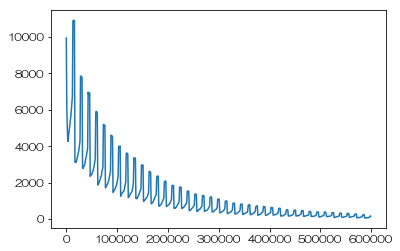

In [64]:
x=time_merge['timestamp_ms'].head(600)
y=time_merge['absent_movie_num'].head(600)
plt.plot(x,y)
plt.show()

全部のデータで襞状になっているので、なんかしらの法則性がある可能性がある

## 基礎集計のまとめ
今回の基礎集計を通じて、以下のことがわかった  
- 動画単体でチェックしたとき、'bicycle'と'potted plant'の動画で長時間のものがみられたが、'person'の動画は長時間のものが上位にはなかった
- 'person'のオブジェクトは単純に登録されている動画数が多いためオブジェクトのデータで上位を記録している
- 動画の時間別の動画数を見てみると時間経過によって動画数が上昇するデータが多く存在する→データの欠損、もしくは法則がある可能性